In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from tqdm import tqdm

# Load the digits dataset
digits = load_digits()

**TODO:** Create an image like the one below by using `plt.subplots` and `imshow`

<div>
<img src="https://drive.google.com/uc?export=view&id=1Jj1EIMCjMHQq5QVVbgBWOXFQwj3md-cj" width="600"/>
</div>

In [3]:
# TODO: Recreate the image above

## Example: Classifying with a random forest

We've done this a few times now so I'll just give this to you already done. Plus, I showed it in class.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Evaluate the classifiers on the test set
print(f"Random Forest accuracy: {rf.score(X_test, y_test):.4f}")

Random Forest accuracy: 0.9756


### Plot Feature Importances as a Heatmap

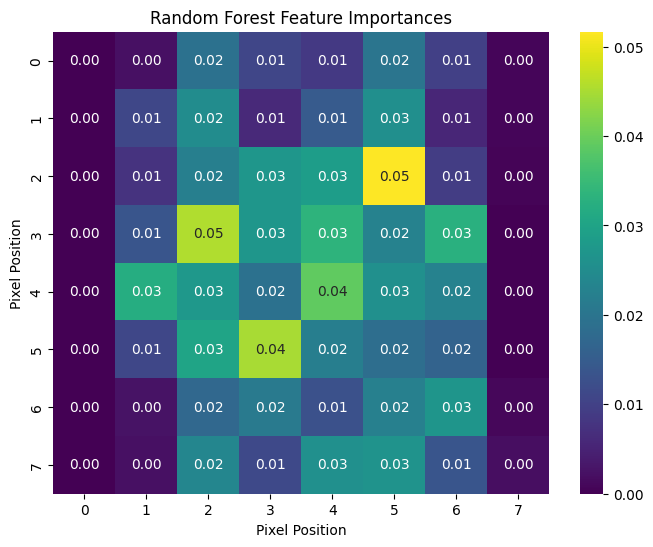

In [5]:
import seaborn as sns

def plot_feature_importances(model, title='Feature Importances'):
    # Reshape importances to match the 8x8 structure of the digits images
    importances_reshaped = model.feature_importances_.reshape((8, 8))

    plt.figure(figsize=(8, 6))
    sns.heatmap(importances_reshaped, cmap='viridis', annot=True, fmt=".2f", cbar=True)
    plt.title(title)
    plt.xlabel('Pixel Position')
    plt.ylabel('Pixel Position')
    plt.show()


plot_feature_importances(rf)


In [1]:
# TODO: plot confusion matrix

from sklearn.metrics import confusion_matrix


In [ ]:
# TODO: Use numpy ufuncs and np.where to find the index of a sample which
# was truly a 5 but was misclassified as a 9, and plot it using imshow.

Do you think it's reasonable that this was misclassifed? How would you have classified it?

Now for your part: Adapt the previous example but now **consider only those samples** where the label (target) value is 6 or 8. In effect we will now be training a binary classifier.

In [ ]:
# TODO: Create a new dataset (X and y arrays) which contain only 6's and 8's

In [ ]:
# TODO: Print out a few images from this new data to verify that this worked as intended. You should be able to reuse the code above



In [ ]:
# TODO: Split the new dataset into training and testing sets again

# Train a new random forest classifier

# Evaluate the classifiers on the test set

Random Forest accuracy: 0.9887640449438202


This seems to be quite an easy task for the Random Forest, don't be worried in this case if you get perfect performance. Based on running this a few times that seems to happen around 3/4 of the time, see for yourself.

The really interesting thing here is the feature importance! I postulated the feature imporances for this experiment in class on Tuesday. What do you expect them to be? How would you explain to a child how to distinguish between a `6` and an `8`?

In [ ]:
plot_feature_importances(rf)

I found this result very satisfying! Is this what you predicted? Does it make sense? (This should be different from the first feature importances heatmap)

# Exploring Hyperparameters

### First we look at the effects of `n_estimators`

checking n=1
checking n=3
checking n=10
checking n=30
checking n=100
checking n=300


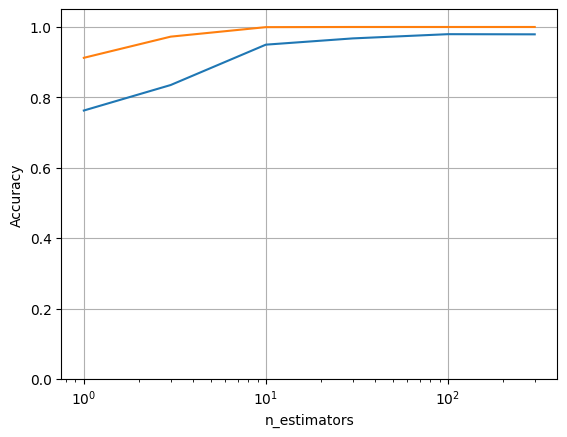

In [10]:
# AS SEEN ON TV!

# What values of n_estimators to check
n_estimators_list = [1,3,10,30,100,300]

# How many runs to do for each n_estimator value
n_samples = 5

# We will collect the results of the experiment in these empty arrays
train_scores = np.empty((len(n_estimators_list), n_samples))
test_scores = np.empty((len(n_estimators_list), n_samples))

for i, n_estimators in enumerate(n_estimators_list):
    print(f'checking n={n_estimators}')

    for j in range(n_samples):
        # Define the model
        rf = RandomForestClassifier(n_estimators=n_estimators)

        # Fit the model
        rf.fit(X_train, y_train)

        # Calcuate the scores
        train_score = rf.score(X_train, y_train)
        test_score = rf.score(X_test, y_test)

        # Store the score for each run and each n_estimator value
        train_scores[i,j] = train_score
        test_scores[i,j] = test_score

plt.plot(n_estimators_list, test_scores.mean(axis=1))
plt.plot(n_estimators_list, train_scores.mean(axis=1))

# Since we are scanning over a couple orders of magnitude it makes sense to put it on a log scale
plt.xscale('log')
plt.ylim(0,1.05) # I made it larger than 1 so we could see the line as it saturates
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

As discussed in class this is strictly a good thing for the loss function but makes it linearly more expensive to train. Let's make our lives easier by deciding once and for all that **we will use the default of `n_estimators` = 100 for the rest of this notebook**

## Exploring the effects of Depth

### Looking at Overfitting


100%|██████████| 15/15 [00:02<00:00,  5.55it/s]


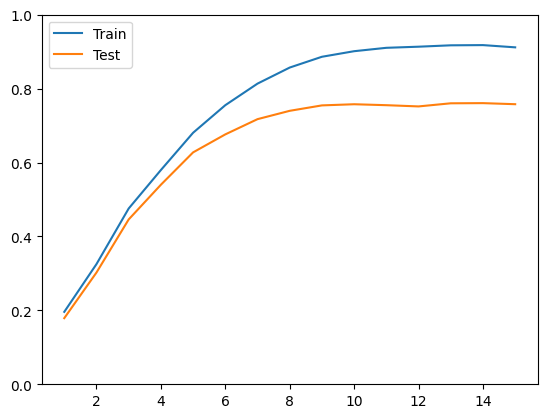

In [21]:
n_samples = 20

# The values of max_depth which we will check
max_depth_list = list(range(1,16))

# Once again, we will collect the results of the experiment in these empty arrays
train_scores = np.empty((len(max_depth_list), n_samples))
test_scores = np.empty((len(max_depth_list), n_samples))

for i in tqdm(range(len(max_depth_list))):
    # I only write it this way (instead of using enumerate) to get tqdm to work.
    max_depth = max_depth_list[i]

    for j in range(n_samples):

        rf = RandomForestClassifier(n_estimators=1, max_depth=max_depth)

        # Fit the model
        rf.fit(X_train, y_train)

        # Calcuate the scores
        train_score = rf.score(X_train, y_train)
        test_score = rf.score(X_test, y_test)

        # Store the score for each run and each n_estimator value
        train_scores[i,j] = train_score
        test_scores[i,j] = test_score


plt.plot(max_depth_list, train_scores.mean(axis=1), label='Train')
plt.plot(max_depth_list, test_scores.mean(axis=1), label='Test')
plt.ylim(0,1)
plt.legend()

**TODO** Consider the gap between the training and test scores. How does this gap relate to the concepts of bias and variance, and what does it tell you about the model's current state (i.e., is it showing signs of overfitting or underfitting)? **Change the number of iterators** to something larger (like 10) and comment upon the result.

## Scanning parameter values
Let's define a function `scan` which takes in the name of a hyperparameter like `'max_depth'`, some list of values for that parameter, and uses cross-validation to evaluate the mean performance of the model (with each value of the given parameter) on the test set. In this example we will continue using RandomForestClassifier as our model.

Let's also make our function take a dictonary of all the other hyperparameter for the model in case we want to change any hyperparameter other than the one we're scanning without needing to edit the function

Use `**` dictionary unpacking to pass the hyperparameters into the RandomForestClassifier.

*Hint*: use a dictionary to pass the scanned hyperparameter into the model, not just the `other_hyperparams`

*Hint*: just store the `.mean()` of the outputs of cross_val_score rather than storing all the values and taking the mean later.

In [22]:
from sklearn.model_selection import cross_val_score

In [25]:
def scan(hyperparam_name: str, scan_values: list, other_hyperparams: dict={}, cv_folds=3):

    # a place to store the scores
    scores = ...

    # TODO: write the code here

    return scores

In [27]:
# The function should work with this input:
scan('max_depth', list(range(1,16)))

100%|██████████| 15/15 [00:21<00:00,  1.43s/it]


array([0.62      , 0.78888889, 0.86444444, 0.90888889, 0.92444444,
       0.95333333, 0.95555556, 0.94888889, 0.95777778, 0.95333333,
       0.96      , 0.94222222, 0.95777778, 0.95555556, 0.94666667])

### Looking at effect of `ccp_alpha`

In [38]:
ccp_alpha_list = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]

scores = # TODO: call your scan fucntion z

100%|██████████| 9/9 [00:15<00:00,  1.70s/it]


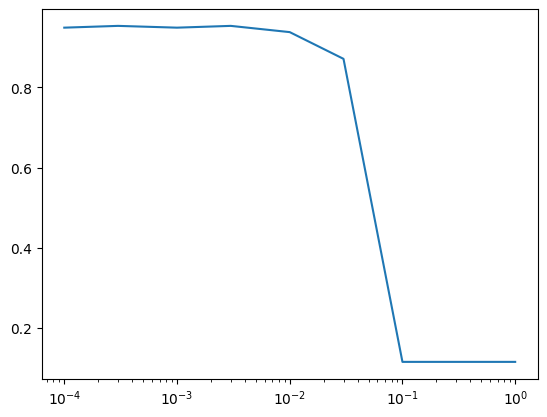

In [34]:
# TODO: Plot the scores on a log scale

In [ ]:
# TODO: Repeat the last exercise using scan with one other Random Forest hyperparameter of your choice

You can now see the complexity of finding the best answer in this space with so many options. And the Random Forest is a pretty simple model as these things go.

We could write a more complicated scan function, but as usual it's easier to just use what SKLearn gives us. Run the cell below and check out the GridSearchCV function, it checks all combinations of hyperparameters and runs cross-validation on each model (It should take around a minute to run).

In [36]:
# NOTHING TODO HERE, but feel free to play around after you answer the question below

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf = RandomForestClassifier()

# Define the grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Print the best score
print(grid_search.best_score_)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.971785763458626


How many Random Forests were trained when we ran this in total with the original setup? (Be careful, I'm going to take a point off for a wrong answer here)